# Laboratiorio 1
## 1) Machine precision
Machine epsilon or machine precision is an upper bound on the relative approximation error due to rounding in floating point arithmetic. Execute the following code:
`import sys`
`help(sys.float_info)`
`print(sys.float_info)`
• understand the meaning of `max`, `max_exp` and `max_10_exp`.
• Write a code to compute the machine precision $\epsilon$ in (float) default precision with a while construct. Compute also the mantissa digits number.
• Use NumPy and exploit the functions `float16` and `float32` in the while statement and see the differences. Check the result of `np.finfo(float).eps`.

In [1]:
import sys
print(sys.float_info)
# max is the largest representable positive finite float
# max_exp is the maximum integer such that 10**(max_exp-1) is a representable finite float
# max_10_exp is the maximum integer such that 10**max_10_exp is a representable finite float

sys.float_info(max=1.7976931348623157e+308, max_exp=1024, max_10_exp=308, min=2.2250738585072014e-308, min_exp=-1021, min_10_exp=-307, dig=15, mant_dig=53, epsilon=2.220446049250313e-16, radix=2, rounds=1)


In [25]:
import numpy as np

def compute_machine_precision(prec):
    precision = prec(1)
    mantissa_digits = 0
    while prec(1) + prec(precision) != prec(1):
        precision /= prec(2)
        mantissa_digits += 1
    return precision * prec(2), mantissa_digits

# Default float precision
default_precision, default_mantissa = compute_machine_precision(float)
print(f"Default float precision: {default_precision}, Mantissa digits: {default_mantissa}")
# np.float16
float16_precision, float16_mantissa = compute_machine_precision(np.float16)
print(f"np.float16 precision: {float16_precision}, Mantissa digits: {float16_mantissa}")
# np.float32
float32_precision, float32_mantissa = compute_machine_precision(np.float32)
print(f"np.float32 precision: {float32_precision}, Mantissa digits: {float32_mantissa}")

print(f"np.finfo(float).eps: {np.finfo(float).eps}")


Default float precision: 2.220446049250313e-16, Mantissa digits: 53
np.float16 precision: 0.0009765625, Mantissa digits: 11
np.float32 precision: 1.1920928955078125e-07, Mantissa digits: 24
np.finfo(float).eps: 2.220446049250313e-16


# 2) Plot of a function
## 2.1) Practice with matplotlib
`Matplotlib` is a plotting library for the Python programming language and its numerical mathematics extension `NumPy`. 
Create a figure combining the cosine and sine curves, on the domain $[0, 10]$:
• add a legend;
• add a title;
• change the default colors.

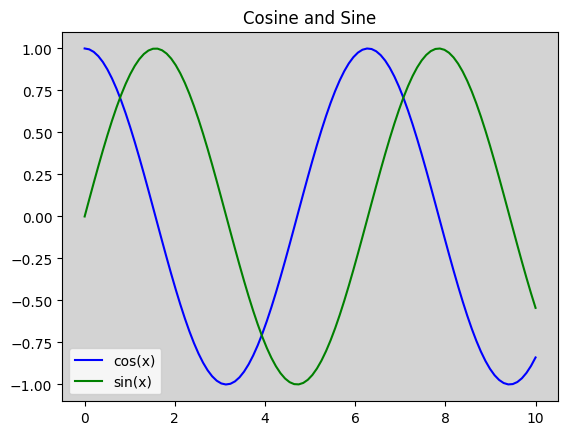

In [53]:
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(0, 10, 100)
plt.axes().set_facecolor('lightgrey')
plt.plot(x, np.cos(x), label='cos(x)', color='blue')
plt.plot(x, np.sin(x), label='sin(x)', color='green')
plt.legend()
plt.title('Cosine and Sine')
plt.show()

## 2.2) The Fibonacci sequence
The Fibonacci sequence is a sequence in which each number is the sum of the two preceding ones and it is formally defined as:
$
\left\{
    \begin{array}{ll}
        F_1 = F_2 = 1 \\
        F_n = F_{n-1} + F_{n-2} & \text{for } n > 2
    \end{array}
\right.
$

• Write a script that, given an input number $n$, computes the number $F_n$ of the Fibonacci sequence.
• Write a code computing, for a natural number $k$, the ratio $r_k = \dfrac{F_{k+1}}{F_k}$, where $F_k$ are the Fibonacci numbers.
• Verify that, for a large k, $\{r_k\}_k$ converges to the value $\varphi = \dfrac{1+\sqrt{5}}{2}$.
• Create a plot of the error (with respect to $\varphi$).

750 Fibonacci number: 2461757021582324272166248155313036893697139996697461509576233211000055607912198979704988704446425834042795269603588522245550271050495783935904220352228801000
Fibonacci ratio for 750: 1.618033988749895


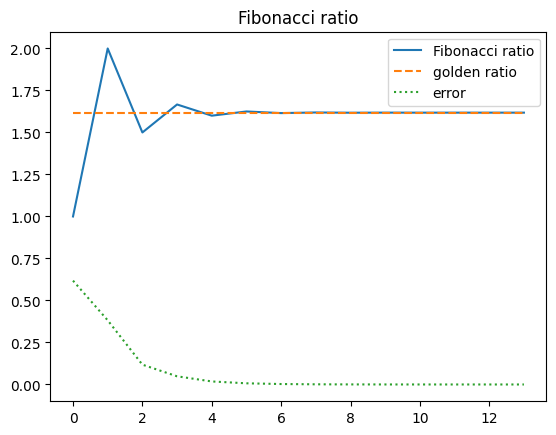

In [62]:
import numpy as np
import matplotlib.pyplot as plt

# Exercise 1
def fibonacci(n, memo={}):
    if n in memo:
        return memo[n]
    if n <= 2:
        return 1
    else:
        memo[n] = fibonacci(n-1, memo) + fibonacci(n-2, memo)
        return memo[n]
    
# Exercise 2
def fibonacci_ratio(k):
    return fibonacci(k+1) / fibonacci(k)

n = input("Insert a number: ")
print(f"{n} Fibonacci number: {fibonacci(int(n))}")
print(f"Fibonacci ratio for {n}: {fibonacci_ratio(int(n))}")

# Exercise 3 - 4
ratios = [fibonacci_ratio(k) for k in range(1, 15)]
phi_ratios = [(1 + np.sqrt(5)) / 2 for k in range(1, 15)]
errors = [np.abs(ratios[k] - phi_ratios[k]) for k in range(len(ratios))]
x = np.arange(1, 1000)
plt.plot(ratios, label='Fibonacci ratio')
plt.plot(phi_ratios, label='golden ratio', linestyle='--')
plt.plot(errors, label='error', linestyle=':')
plt.legend()
plt.title('Fibonacci ratio')
plt.show()